In [6]:
dist=35786000

c=299792458
sample_rate = 30.72e6

prop_delay=dist/c*2

ntn_koffset = prop_delay *15000

ntn_ta_common = prop_delay

cellSpecificKoffset_r17=ntn_koffset

print("prop_delay: ",prop_delay)
print("ntn_koffset: ",ntn_koffset)
print("ntn_ta_common: ",ntn_ta_common)
print("cellSpecificKoffset_r17: ",cellSpecificKoffset_r17)


prop_delay:  0.2387384942152214
ntn_koffset:  3581.077413228321
ntn_ta_common:  0.2387384942152214
cellSpecificKoffset_r17:  3581.077413228321


In [5]:
import os
import re

# 目标文件夹路径
directory = "../result"

# 定义需要追加的 size 值
size = 56

# 遍历目标文件夹中的所有文件
for filename in os.listdir(directory):
    # 完整文件路径
    filepath = os.path.join(directory, filename)

    # 检查文件是否符合格式并删除 _2.txt 文件
    if re.match(r".+#.+#.+#.+_2\.txt", filename):
        print(f"Deleting: {filepath}")
        os.remove(filepath)
    # 检查文件是否符合标准格式并修改文件名
    '''
    elif re.match(r".+#.+#.+#.+\.txt", filename):
        # 提取当前文件名的信息
        base, ext = os.path.splitext(filename)  # 分离文件名和扩展名
        # 确保没有 _2 的文件
        if not base.endswith("_2"):
            new_filename = f"{base}#{size}{ext}"
            new_filepath = os.path.join(directory, new_filename)
            print(f"Renaming: {filepath} -> {new_filepath}")
            os.rename(filepath, new_filepath)
    '''


In [24]:
directory = "../result"
for filename in os.listdir(directory):
    if filename.startswith("Con"):
        print(f"Processing: {filename}")
        if filename.startswith("Con") and re.match(r".+#.+#.+#.+#.+#.+#.+\.txt", filename):
            # 提取当前文件名的信息
            print("filename: ", filename)

Processing: Configured_grant#15#50#200#56.txt
Processing: Configured_grant#10#20#500#56.txt
Processing: Configured_grant#30#45#220#56#5.txt
Processing: Configured_grant#30#35#285#56.txt
Processing: Configured_grant#10#35#285#56#2#5.txt
filename:  Configured_grant#10#35#285#56#2#5.txt
Processing: Configured_grant#15#55#180#56#5.txt
Processing: Configured_grant#15#55#180#56#2.txt
Processing: Configured_grant#20#35#285#56#2#2.txt
filename:  Configured_grant#20#35#285#56#2#2.txt
Processing: Configured_grant#30#45#220#56#3.txt
Processing: Configured_grant#15#45#220#56#4.txt
Processing: Configured_grant#15#20#500#56.txt
Processing: Configured_grant#15#45#220#56#2#5.txt
filename:  Configured_grant#15#45#220#56#2#5.txt
Processing: Configured_grant#45#25#400#56.txt
Processing: Configured_grant#25#10#1000#56.txt
Processing: Configured_grant#30#55#180#56#5.txt
Processing: Configured_grant#20#45#220#56#2#2.txt
filename:  Configured_grant#20#45#220#56#2#2.txt
Processing: Configured_grant#30#55#180#

In [31]:
import os
import re
import csv

# 目标目录
directory = "../result"

# 输出的汇总文件名
output_file = "summary.csv"

# 存储结果的列表
results = []

# 遍历目录中的所有文件
for filename in os.listdir(directory):
    # 检查文件是否符合格式

    if (not filename.startswith("Con") and re.match(r".+#.+#.+#.+#.+#.+\.txt", filename)) or \
       (filename.startswith("Con") and re.match(r".+#.+#.+#.+#.+#.+#.+\.txt", filename)):
        # 生成文件路径
        #print(f"Processing: {filename}")
        filepath = os.path.join(directory, filename)
        
        # 打开并读取文件内容
        with open(filepath, "r") as file:
            content = file.read()
            
            # 提取 xmt、rcv、%loss
            match = re.search(r"xmt/rcv/%loss = (\d+)/(\d+)/(\d+)%", content)
            match2 = re.search(r'min/avg/max = [\d.]+/([\d.]+)/[\d.]+', content)
            if match2:
                avg = match2.group(1)
          
            else:
                avg = None

            if match:
                xmt, rcv, loss = match.groups()
            else:
                xmt, rcv, loss = None, None, None

            # 提取 timeouts
            timeout_match = re.search(r"(\d+) timeouts \(waiting for response\)", content)
            timeouts = timeout_match.group(1) if timeout_match else None
            
            # 提取文件中的 {type}、{delay}、{period}、{count}、{size}
            #print(filename)
            try:
                type_, delay, period, count, size, sample = filename.split("#")
            except:
                try:
                    type_, delay, period, count, size, CG_period, sample = filename.split("#")
                except:
                    continue
            sample = sample.replace(".txt", "")
            
            if loss=="100":
                print(filepath)
                #os.remove(filepath)
            # 添加到结果列表
            results.append({
                "type": type_,
                "delay": delay,
                "period": period,
                "count": count,
                "size": size,
                "xmt": xmt,
                "rcv": rcv,
                "loss": loss,
                "timeouts": timeouts,
                "sample": sample,
                "avg": avg
            })

# 写入汇总文件
with open(output_file, "w", newline="") as csvfile:
    fieldnames = ["type", "delay", "period", "count", "size", "xmt", "rcv", "loss", "timeouts","sample","avg"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # 写入表头
    writer.writeheader()

    # 写入数据
    for result in results:
        writer.writerow(result)

print(f"Summary saved to {output_file}")


../result/rach_based#30#35#285#56#1.txt
../result/rach_based#30#35#285#56#2.txt
../result/dynamicGrant#30#45#220#56##1.txt
../result/Configured_grant#30#35#285#56#2#2.txt
../result/rach_based#25#35#285#56#1.txt
../result/dynamicGrant#25#35#285#56##2.txt
../result/dynamicGrant#30#35#285#56##1.txt
../result/dynamicGrant#30#45#220#56##2.txt
../result/rach_based#25#35#285#56#3.txt
../result/Configured_grant#30#35#285#56#2#1.txt
../result/rach_based#30#45#220#56#2.txt
Summary saved to summary.csv


# Configured grant

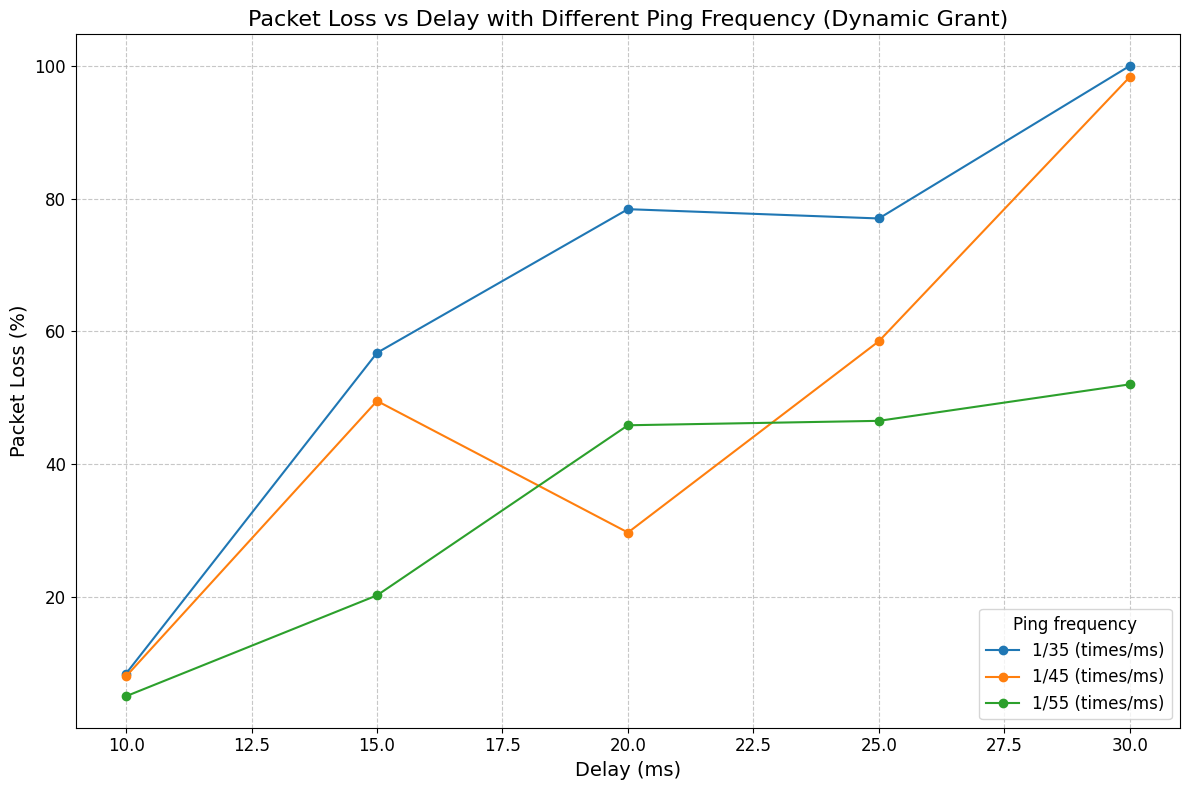

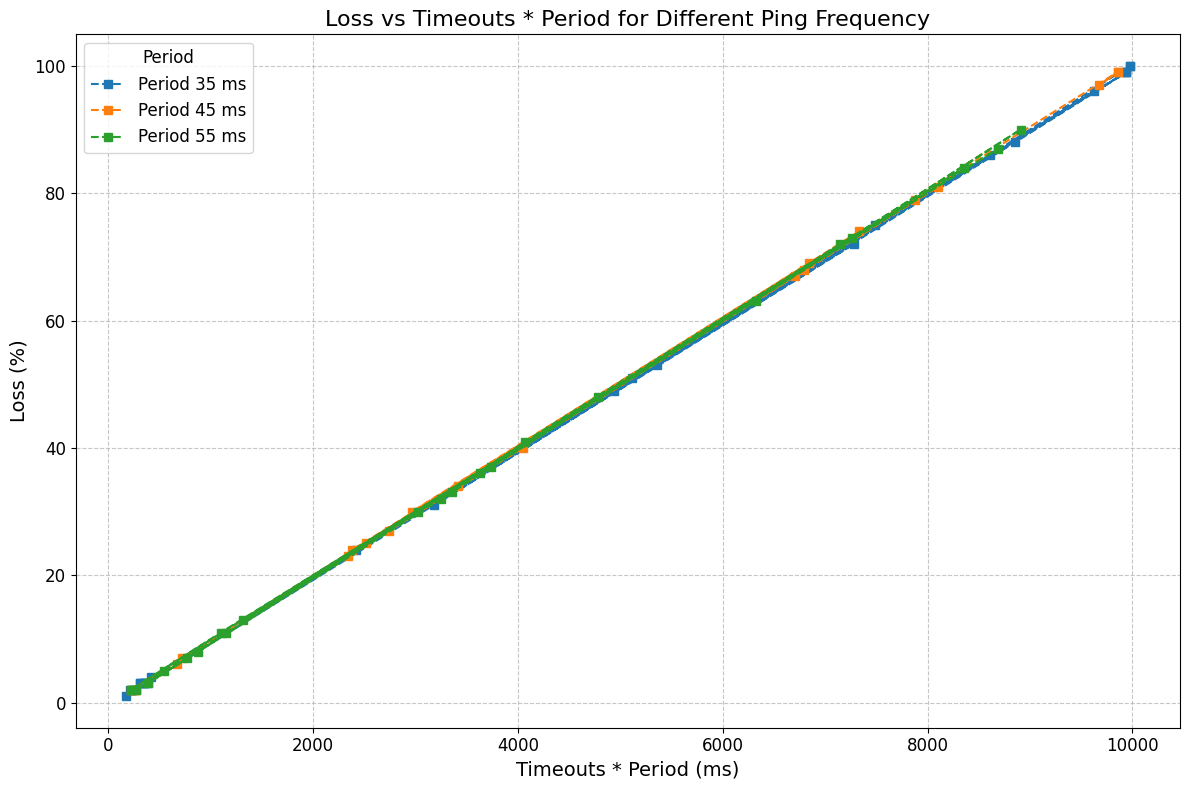

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the summary data from the CSV file
summary_file = "summary.csv"
data = pd.read_csv(summary_file)

#data=data[data['type']=="dynamicGrant"]

data=data[data['type']=="Configured_grant"]
#data=data[data['type']=="rach_based"]

# Convert necessary columns to numeric for plotting
data['delay'] = pd.to_numeric(data['delay'], errors='coerce')
data['period'] = pd.to_numeric(data['period'], errors='coerce')
data['loss'] = pd.to_numeric(data['loss'], errors='coerce')
data['timeouts'] = pd.to_numeric(data['timeouts'], errors='coerce')

# Calculate timeouts * period (milliseconds)
data['timeouts_period_ms'] = data['timeouts'] * data['period']

# Sort the data by delay and period
sorted_data = data.sort_values(by=['period', 'delay'])

# 1. Plot loss vs. delay for the same period (multiple lines for different periods)
plt.figure(figsize=(12, 8))

for i,period in enumerate(sorted_data['period'].unique()):
    subset = sorted_data[sorted_data['period'] == period]
    subset = subset.groupby('delay')['loss'].mean().reset_index()

    #if i%2==1:
    #    if period in [35,45,55]:
    plt.plot(subset['delay'], subset['loss'], marker='o', label=f'{1}/{period} (times/ms)', linestyle='-', linewidth=1.5)

plt.title('Packet Loss vs Delay with Different Ping Frequency (Dynamic Grant)', fontsize=16)
plt.xlabel('Delay (ms)', fontsize=14)
plt.ylabel('Packet Loss (%)', fontsize=14)
plt.legend(title='Ping frequency',  loc='lower right', fontsize=12, title_fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig("loss_vs_delay.png", dpi=300)  # Save high-resolution figure
plt.show()

# 2. Plot loss vs. timeouts * period for the same period (multiple lines for different periods)
plt.figure(figsize=(12, 8))

for period in sorted_data['period'].unique():
    subset = sorted_data[sorted_data['period'] == period]
    plt.plot(subset['timeouts_period_ms'], subset['loss'], marker='s', label=f'Period {period} ms', linestyle='--', linewidth=1.5)

plt.title('Loss vs Timeouts * Period for Different Ping Frequency', fontsize=16)
plt.xlabel('Timeouts * Period (ms)', fontsize=14)
plt.ylabel('Loss (%)', fontsize=14)
plt.legend(title='Period', loc='upper left', fontsize=12, title_fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig("loss_vs_timeouts_period.png", dpi=300)  # Save high-resolution figure
plt.show()



# Mix plot

/tmp/ipykernel_2801279/3463289576.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = sorted_data[sorted_data['type'] == type][sorted_data['period'] == 55]
/tmp/ipykernel_2801279/3463289576.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  subset = subset.groupby('delay').apply(lambda x: x.nsmallest(n, 'loss')['loss'].mean()).reset_index(name='loss')
/tmp/ipykernel_2801279/3463289576.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = sorted_data[sorted_data['type'] == type][sorted_data['period'] == 55]
/tmp/ipykernel_2801279/3463289576.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame

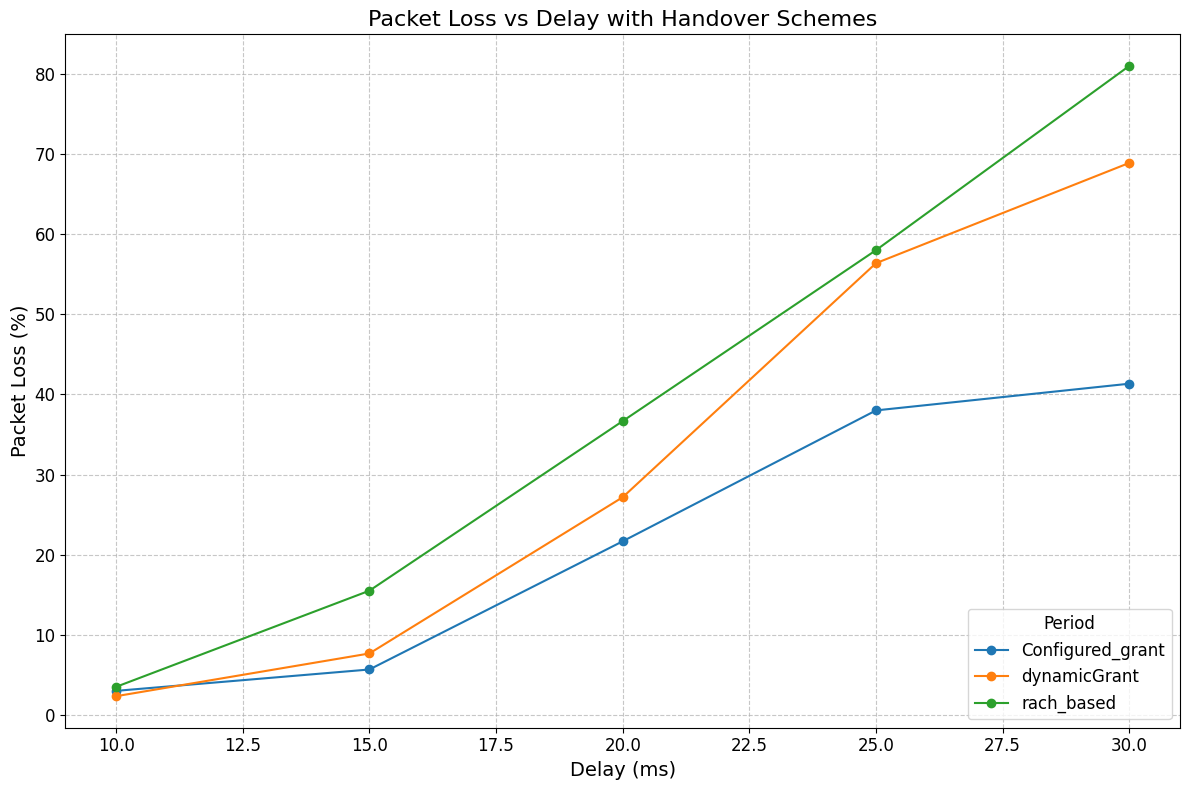

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the summary data from the CSV file
summary_file = "summary.csv"
data = pd.read_csv(summary_file)



sorted_data = data.sort_values(by=['period', 'delay'])

# 1. Plot loss vs. delay for the same period (multiple lines for different periods)
plt.figure(figsize=(12, 8))

for i,type in enumerate(sorted_data['type'].unique()):
    subset = sorted_data[sorted_data['type'] == type][sorted_data['period'] == 55]
    #
    if type=="Configured_grant":
        n = 3  # 每組取前 n 小
        subset = subset.groupby('delay').apply(lambda x: x.nsmallest(n, 'loss')['loss'].mean()).reset_index(name='loss')
    else:
        subset = subset.groupby('delay')['loss'].mean().reset_index()
    #print("subset: ", subset)
    #if i%2==1:
    #    if period in [35,45,55]:
    plt.plot(subset['delay'], subset['loss'], marker='o', label=f'{type}', linestyle='-', linewidth=1.5)



'''
plt.plot(data_time[:5], data_rach[:5], marker='o', label=f'RACH-based', linestyle='-', linewidth=1.5)
plt.plot(data_time[:5], data_conf[:5], marker='o', label=f'Configured Grant', linestyle='-', linewidth=1.5)
plt.plot(data_time[:5], data_dyna[:5], marker='o', label=f'Dynamic Grant', linestyle='-', linewidth=1.5)


plt.plot(data_time[:5], data_rach[:5], marker='o', label=f'RACH-based', linestyle='-', linewidth=1.5)
plt.plot(data_time[:5], data_conf[:5], marker='o', label=f'Configured Grant', linestyle='-', linewidth=1.5)
plt.plot(data_time[:5], data_dyna[:5], marker='o', label=f'Dynamic Grant', linestyle='-', linewidth=1.5)
'''

plt.title('Packet Loss vs Delay with Handover Schemes', fontsize=16)
plt.xlabel('Delay (ms)', fontsize=14)
plt.ylabel('Packet Loss (%)', fontsize=14)
plt.legend(title='Period',  loc='lower right', fontsize=12, title_fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig("loss_vs_delay.png", dpi=300)  # Save high-resolution figure
plt.show()



# RTT

/tmp/ipykernel_2801279/3507586768.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = sorted_data[sorted_data['type'] == type][sorted_data['period'] == 55]
/tmp/ipykernel_2801279/3507586768.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  subset = subset.groupby('delay').apply(lambda x: x.nsmallest(n, 'avg')['avg'].mean()).reset_index(name='avg')
/tmp/ipykernel_2801279/3507586768.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset = sorted_data[sorted_data['type'] == type][sorted_data['period'] == 55]
/tmp/ipykernel_2801279/3507586768.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping col

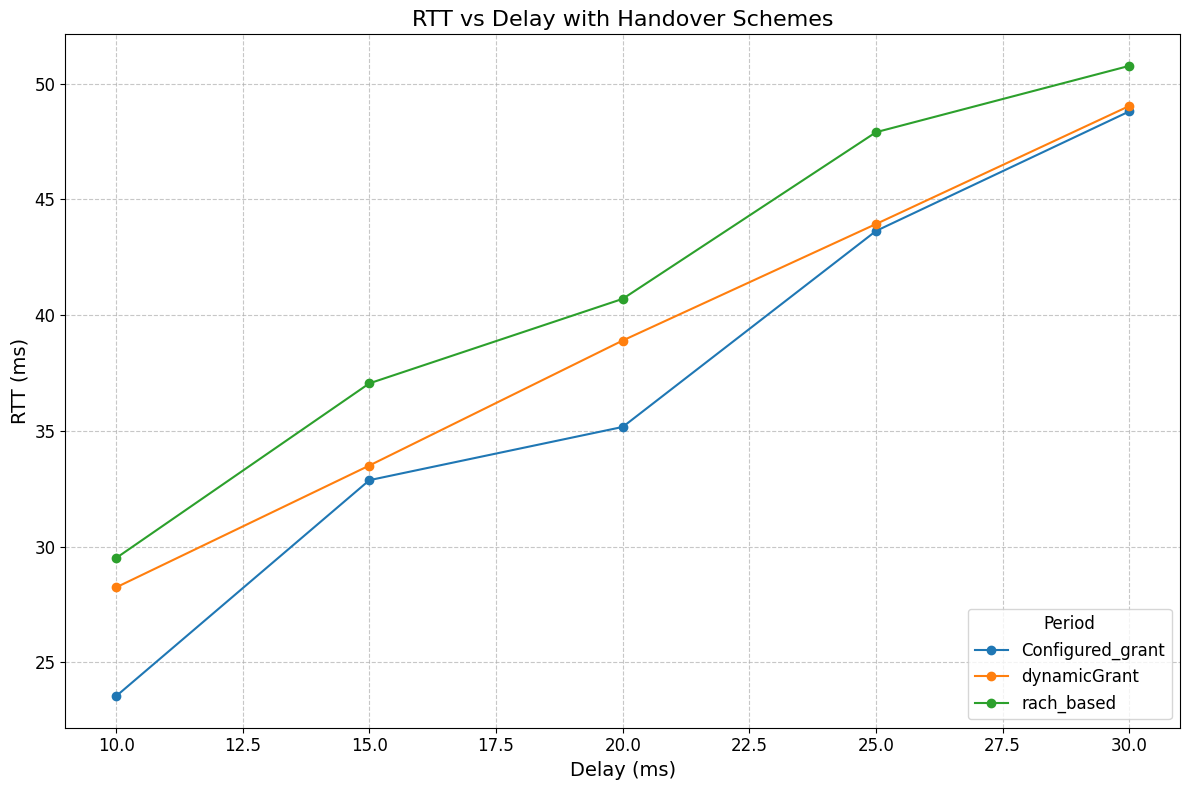

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the summary data from the CSV file
summary_file = "summary.csv"
data = pd.read_csv(summary_file)



sorted_data = data.sort_values(by=['period', 'delay'])

# 1. Plot loss vs. delay for the same period (multiple lines for different periods)
plt.figure(figsize=(12, 8))

for i,type in enumerate(sorted_data['type'].unique()):
    subset = sorted_data[sorted_data['type'] == type][sorted_data['period'] == 55]
    #
    if type=="Configured_grant" or type=="dynamicGrant":
        n = 3  # 每組取前 n 小
        subset = subset.groupby('delay').apply(lambda x: x.nsmallest(n, 'avg')['avg'].mean()).reset_index(name='avg')
    else:
        subset = subset.groupby('delay')['avg'].mean().reset_index()
    #print("subset: ", subset)
    #if i%2==1:
    #    if period in [35,45,55]:
    plt.plot(subset['delay'], subset['avg'], marker='o', label=f'{type}', linestyle='-', linewidth=1.5)



'''
plt.plot(data_time[:5], data_rach[:5], marker='o', label=f'RACH-based', linestyle='-', linewidth=1.5)
plt.plot(data_time[:5], data_conf[:5], marker='o', label=f'Configured Grant', linestyle='-', linewidth=1.5)
plt.plot(data_time[:5], data_dyna[:5], marker='o', label=f'Dynamic Grant', linestyle='-', linewidth=1.5)


plt.plot(data_time[:5], data_rach[:5], marker='o', label=f'RACH-based', linestyle='-', linewidth=1.5)
plt.plot(data_time[:5], data_conf[:5], marker='o', label=f'Configured Grant', linestyle='-', linewidth=1.5)
plt.plot(data_time[:5], data_dyna[:5], marker='o', label=f'Dynamic Grant', linestyle='-', linewidth=1.5)
'''

plt.title('RTT vs Delay with Handover Schemes', fontsize=16)
plt.xlabel('Delay (ms)', fontsize=14)
plt.ylabel('RTT (ms)', fontsize=14)
plt.legend(title='Period',  loc='lower right', fontsize=12, title_fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
#plt.savefig("loss_vs_delay.png", dpi=300)  # Save high-resolution figure
plt.show()

